In [1]:
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as pl

In [2]:
zip_file_path = 'DayandNight.zip'
extracted_dir_path = 'Day and Night'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Persentase data yang akan digunakan untuk validasi
)

In [4]:
train_generator = datagen.flow_from_directory(
    extracted_dir_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 364 images belonging to 2 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    extracted_dir_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 90 images belonging to 2 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size
)

Epoch 1/10
11/11 [==============================] - 20s 2s/step - loss: 0.8246 - accuracy: 0.7198 - val_loss: 0.3522 - val_accuracy: 0.8444
Epoch 2/10
11/11 [==============================] - 19s 2s/step - loss: 0.0724 - accuracy: 0.9725 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 3/10
11/11 [==============================] - 20s 2s/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0702 - val_accuracy: 0.9778
Epoch 4/10
11/11 [==============================] - 21s 2s/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 23s 2s/step - loss: 0.0075 - accuracy: 0.9945 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/10
11/11 [==============================] - 26s 2s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 5.5278e-04 - val_accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 26s 2s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 8/10
11/11

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [14]:
total_layers = len(model.layers)
print("Total layers dalam model:", total_layers)
print("Total hidden layers dalam model:", total_layers - 2)

Total layers dalam model: 9
Total hidden layers dalam model: 7


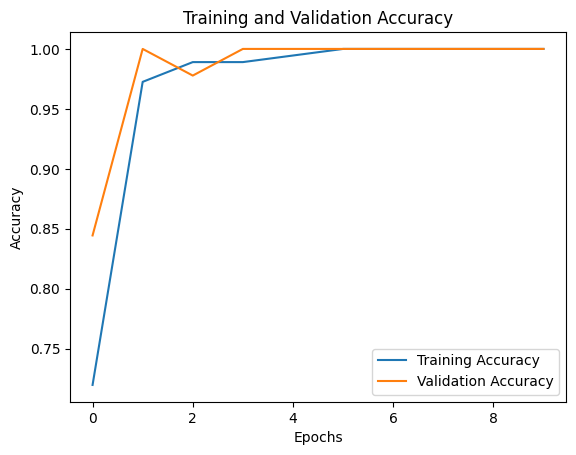

In [9]:
pl.plot(history.history['accuracy'], label='Training Accuracy')
pl.plot(history.history['val_accuracy'], label='Validation Accuracy')
pl.title('Training and Validation Accuracy')
pl.xlabel('Epochs')
pl.ylabel('Accuracy')
pl.legend()
pl.show()

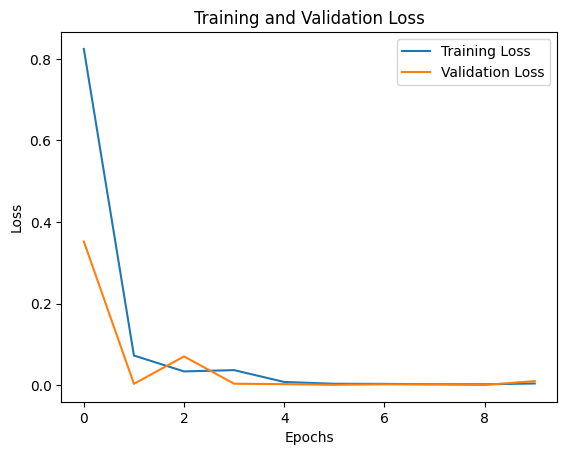

In [10]:
pl.plot(history.history['loss'], label='Training Loss')
pl.plot(history.history['val_loss'], label='Validation Loss')
pl.title('Training and Validation Loss')
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.legend()
pl.show()

In [11]:
model.save('Day_Night_Model.h5')

d:\AI\Final project_AI\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
